### Importing Libraries

In [1]:
# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from imblearn.over_sampling import SMOTE

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import confusion_matrix

# Let's ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

### Loading Train Data

In [2]:
claims = pd.read_csv("train.csv")

In [3]:
claims.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,7957,North East,Assam,Rural,Guwhati,Personal,Household,AC,0,1,...,0,0,0,4474.0,12,202,Manufacturer,30.0,Claim,0
1,1396,East,Delhi,Urban,New Delhi,Personal,Entertainment,TV,0,0,...,1,1,1,25000.0,13,60,Dealer,1.3,Complaint,0
2,7582,West,Andhra Pradesh,Rural,Hyderabad,Business,Household,AC,0,0,...,0,0,0,10000.0,12,3,Dealer,2.5,Claim,0
3,5824,West,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,0,0,...,1,1,0,4216.0,10,672,Dealer,25.0,Other,0
4,4086,South West,Kerala,Rural,Kochi,Business,Household,AC,0,0,...,0,0,0,20000.0,13,3,Manufacturer,6.5,Claim,0


In [4]:
claims.shape

(8341, 21)

### Exploratory Data Analysis

In [5]:
claims.loc[(claims.State == "UP"), "State"] = "Uttar Pradesh"  ## Replacing UP with Uttar Pradesh

In [6]:
claims.loc[(claims.Purpose == "claim"), "Purpose"] = "Claim"  ## Replacing claim with Claim

In [7]:
claims.loc[(claims.State == "Telengana"), "City"] = "Hyderabad 1"   ## Separating hyderbad among two states. like Andhra Pradesh = Hyderbad, Telengana = Hyderabad 1

In [8]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8341 non-null   int64  
 1   Region            8341 non-null   object 
 2   State             8341 non-null   object 
 3   Area              8341 non-null   object 
 4   City              8341 non-null   object 
 5   Consumer_profile  8341 non-null   object 
 6   Product_category  8341 non-null   object 
 7   Product_type      8341 non-null   object 
 8   AC_1001_Issue     8341 non-null   int64  
 9   AC_1002_Issue     8341 non-null   int64  
 10  AC_1003_Issue     8341 non-null   int64  
 11  TV_2001_Issue     8341 non-null   int64  
 12  TV_2002_Issue     8341 non-null   int64  
 13  TV_2003_Issue     8341 non-null   int64  
 14  Claim_Value       8101 non-null   float64
 15  Service_Centre    8341 non-null   int64  
 16  Product_Age       8341 non-null   int64  


In [9]:
claims.describe() #checking mean median count of continous various variables in dataset

,Unnamed: 0,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
count,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8101.000000,8341.000000,8341.000000,8341.000000,8341.000000
mean,13382.184750,0.268913,0.300563,0.190025,0.354274,0.433042,0.296247,14051.151586,12.832154,168.595013,10.709076,0.079847
std,21643.277349,0.572955,0.587182,0.500576,0.587451,0.639980,0.546295,13200.318156,1.724802,237.713181,11.610211,0.271072
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.000000,0.500000,0.000000
25%,2963.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4862.000000,12.000000,10.000000,1.500000,0.000000
50%,5991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,13.000000,21.000000,2.600000,0.000000
75%,8957.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,20000.000000,14.000000,284.000000,22.000000,0.000000
max,99311.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,50000.000000,16.000000,991.000000,30.000000,1.000000


<AxesSubplot:>

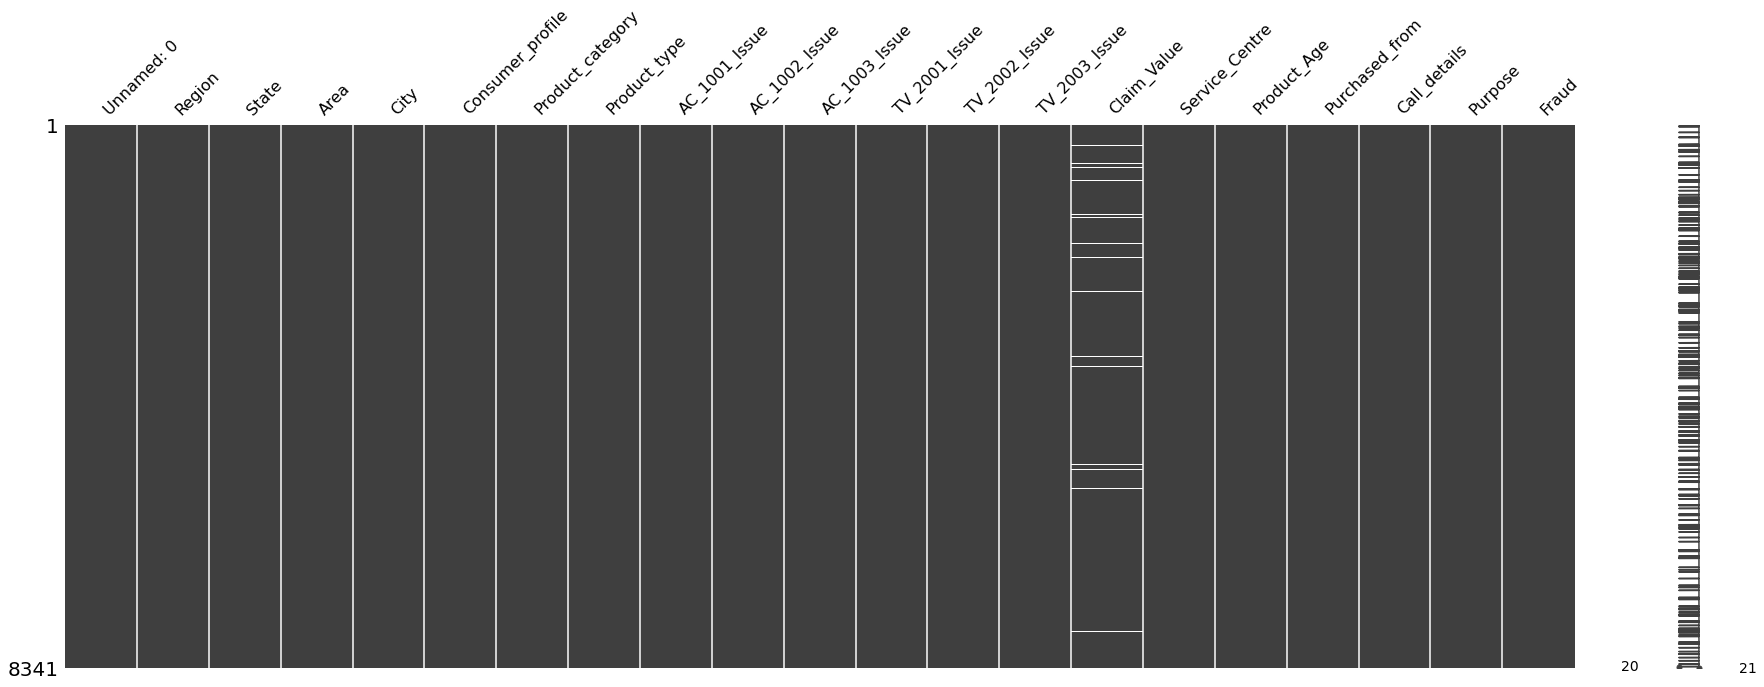

In [10]:
missingno.matrix(claims, figsize = (30,10)) #plotting missing value

In [11]:
claims.isnull().sum() #count of missing values

Unnamed: 0            0
Region                0
State                 0
Area                  0
City                  0
Consumer_profile      0
Product_category      0
Product_type          0
AC_1001_Issue         0
AC_1002_Issue         0
AC_1003_Issue         0
TV_2001_Issue         0
TV_2002_Issue         0
TV_2003_Issue         0
Claim_Value         240
Service_Centre        0
Product_Age           0
Purchased_from        0
Call_details          0
Purpose               0
Fraud                 0
dtype: int64

### To perform our data analysis, let's create two new dataframes


In [12]:
claims_bin = pd.DataFrame() # for discretised continuous variables
claims_con = pd.DataFrame() # for continuous variables

In [13]:
claims.dtypes #different types in datasets

Unnamed: 0            int64
Region               object
State                object
Area                 object
City                 object
Consumer_profile     object
Product_category     object
Product_type         object
AC_1001_Issue         int64
AC_1002_Issue         int64
AC_1003_Issue         int64
TV_2001_Issue         int64
TV_2002_Issue         int64
TV_2003_Issue         int64
Claim_Value         float64
Service_Centre        int64
Product_Age           int64
Purchased_from       object
Call_details        float64
Purpose              object
Fraud                 int64
dtype: object

#### 1st column : Region

In [14]:
# How many missing values does Region have?
claims.Region.isnull().sum() 

0

In [15]:
# unique value counts
claims.Region.value_counts()

South         1827
North East    1241
South East    1144
West          1132
East           816
North          782
South West     748
North West     651
Name: Region, dtype: int64

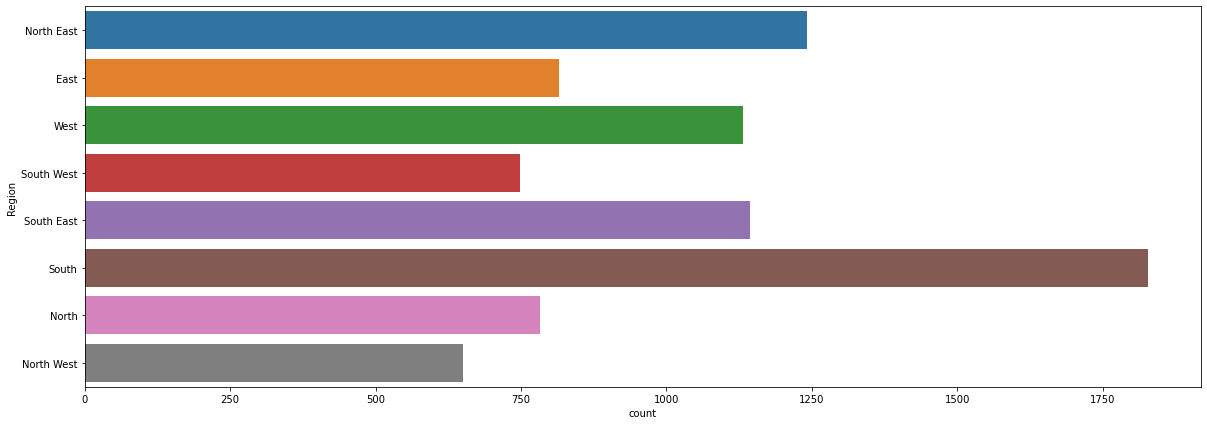

In [16]:
#regions distribution 
fig = plt.figure(figsize=(20,7))
sns.countplot(y='Region', data=claims);

In [17]:
# adding this to subset dataframes
claims_bin['Region'] = claims['Region']
claims_con['Region'] = claims['Region']

#### 2nd column : State

In [18]:
# How many missing values does State have?
claims.State.isnull().sum()

0

In [19]:
#unique value count
claims.State.value_counts()

Andhra Pradesh    1216
Tamilnadu         1020
Maharshtra         871
Gujarat            748
Kerala             730
Karnataka          708
Delhi              627
Bihar              578
Uttar Pradesh      381
West Bengal        352
Odisha             312
Telengana          188
Goa                169
Tripura             99
Assam               79
Jharkhand           74
HP                  53
Rajasthan           53
MP                  43
Haryana             29
J&K                 11
Name: State, dtype: int64

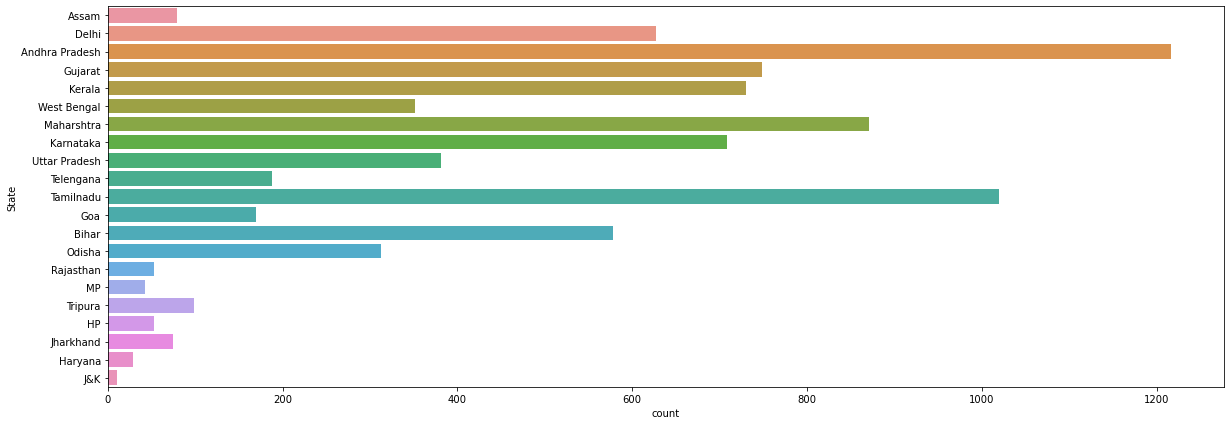

In [20]:
#States distribution 
fig = plt.figure(figsize=(20,7))
sns.countplot(y='State', data=claims);

In [21]:
# adding this to subset dataframes
claims_bin['State'] = claims['State']
claims_con['State'] = claims['State']

#### 3rd column : Area

In [22]:
# How many missing values does Area have?
claims.Area.isnull().sum()

0

In [23]:
#unique values count
claims.Area.value_counts()

Urban    5319
Rural    3022
Name: Area, dtype: int64

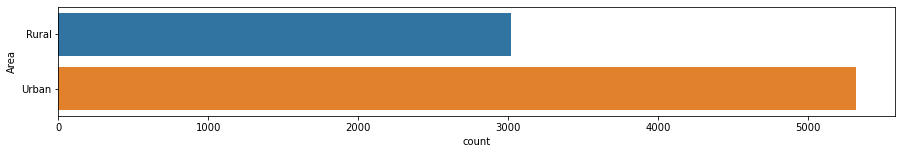

In [24]:
#States distribution 
fig = plt.figure(figsize=(15,2))
sns.countplot(y='Area', data=claims);

In [25]:
# adding this to subset dataframes
claims_bin['Area'] = claims['Area']
claims_bin['Area'] = np.where(claims_bin['Area'] == 'Urban', 1, 0) # change Area to 1 for Urban and 0 for Rural
claims_con['Area'] = claims['Area']

#### 4th column : City

In [26]:
# How many missing values does State have?
claims.City.isnull().sum() 

0

In [27]:
# unique value count
claims.City.value_counts()

Chennai        1020
Hyderabad       814
Kochi           730
Bangalore       708
Mumbai          672
New Delhi       491
Vadodara        397
Kolkata         352
Ahmedabad       351
Lucknow         344
Purnea          323
Bhubaneswar     312
Vijayawada      288
Patna           255
Pune            199
Hyderabad 1     188
Panaji          169
Delhi           136
Vizag           114
Agartala         99
Guwhati          79
Ranchi           74
Jaipur           53
Shimla           53
Bhopal           43
Meerut           37
Chandigarh       29
Srinagar         11
Name: City, dtype: int64

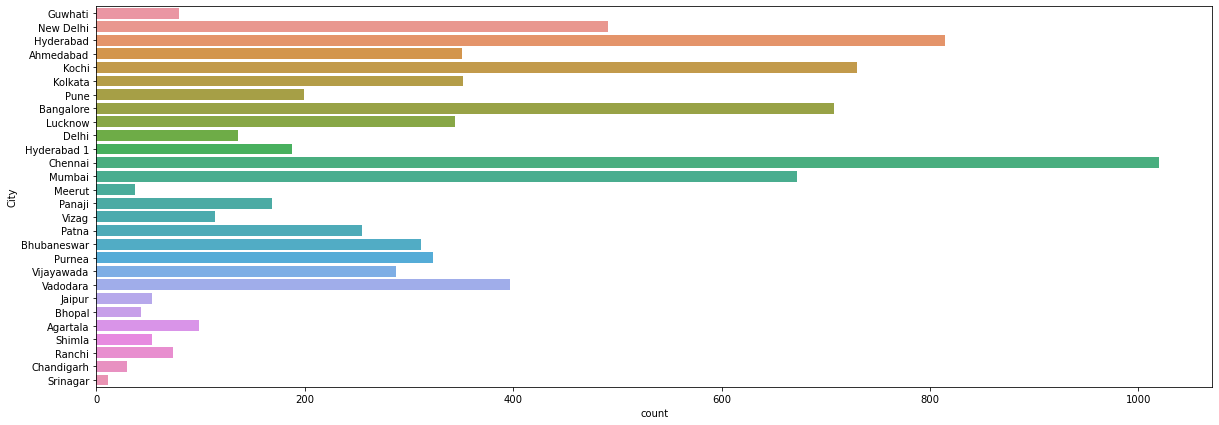

In [28]:
#City distribution 
fig = plt.figure(figsize=(20,7))
sns.countplot(y='City', data=claims);

In [29]:
# adding this to subset dataframes
claims_bin['City'] = claims['City']
claims_con['City'] = claims['City']

#### 5th column : Consumer_profile

In [30]:
# How many missing values does Consumer_profile have?
claims.Consumer_profile.isnull().sum()

0

In [31]:
#unique value count
claims.Consumer_profile.value_counts()

Personal    4973
Business    3368
Name: Consumer_profile, dtype: int64

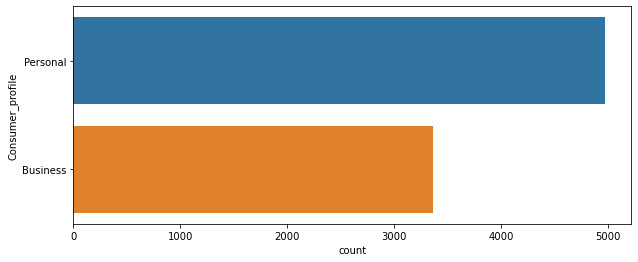

In [32]:
#Consumer_profile distribution 
fig = plt.figure(figsize=(10,4))
sns.countplot(y='Consumer_profile', data=claims);

In [33]:
# adding this to subset dataframes
claims_bin['Consumer_profile'] = claims['Consumer_profile']
claims_bin['Consumer_profile'] = np.where(claims_bin['Consumer_profile'] == 'Business', 1, 0) # change Consumer profile to 1 for Business and 0 for Personal
claims_con['Consumer_profile'] = claims['Consumer_profile']

#### 6th column : Product_category

In [34]:
# How many missing values does Product_category have?
claims.Product_category.isnull().sum() 

0

In [35]:
# unique value count
claims.Product_category.value_counts()

Entertainment    4561
Household        3780
Name: Product_category, dtype: int64

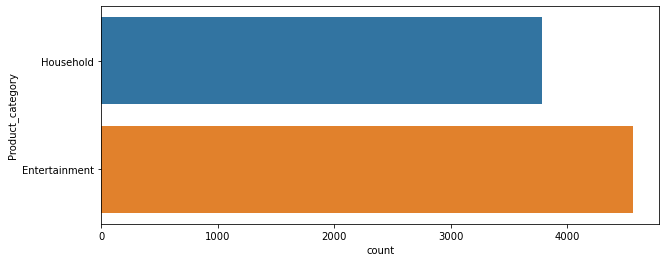

In [36]:
#Product_category distribution 
fig = plt.figure(figsize=(10,4))
sns.countplot(y='Product_category', data=claims);

In [37]:
# adding this to subset dataframes
claims_bin['Product_category'] = claims['Product_category']
claims_bin['Product_category'] = np.where(claims_bin['Product_category'] == 'Entertainment', 1, 0) # change Product_category to 1 for Entertainment and 0 for Household
claims_con['Product_category'] = claims['Product_category']

#### 7th column : Product_type

In [38]:
# How many missing values does Product_type have?
claims.Product_type.isnull().sum()

0

In [39]:
#unique value count
claims.Product_type.value_counts()

TV    4561
AC    3780
Name: Product_type, dtype: int64

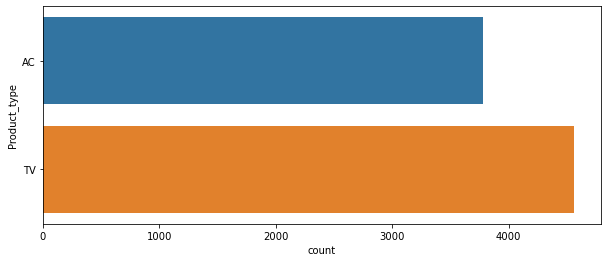

In [40]:
#Product_category distribution 
fig = plt.figure(figsize=(10,4))
sns.countplot(y='Product_type', data=claims);

In [41]:
# adding this to subset dataframes
claims_bin['Product_type'] = claims['Product_type']
claims_bin['Product_type'] = np.where(claims_bin['Product_type'] == 'TV', 1, 0) # change Product_type to 1 for TV and 0 for AC
claims_con['Product_type'] = claims['Product_type']

#### 8th column : AC_1001_Issue

In [42]:
# How many missing values does AC_1001_Issue have?
claims.AC_1001_Issue.isnull().sum()

0

In [43]:
claims.AC_1001_Issue.value_counts()

0    6647
1    1145
2     549
Name: AC_1001_Issue, dtype: int64

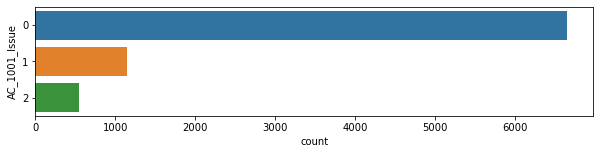

In [44]:
#AC_1001_Issue distribution 
fig = plt.figure(figsize=(10,2))
sns.countplot(y='AC_1001_Issue', data=claims);

In [45]:
# adding this to subset dataframes
claims_bin['AC_1001_Issue'] = claims['AC_1001_Issue']
claims_con['AC_1001_Issue'] = claims['AC_1001_Issue']

#### 9th column : AC_1002_Issue

In [46]:
# How many missing values does AC_1002_Issue have?
claims.AC_1002_Issue.isnull().sum()

0

In [47]:
#unique value count
claims.AC_1002_Issue.value_counts()

0    6395
1    1385
2     561
Name: AC_1002_Issue, dtype: int64

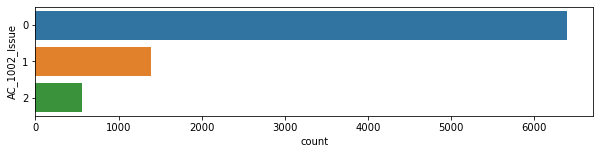

In [48]:
#AC_1002_Issue distribution 
fig = plt.figure(figsize=(10,2))
sns.countplot(y='AC_1002_Issue', data=claims);

In [49]:
# adding this to subset dataframes
claims_bin['AC_1002_Issue'] = claims['AC_1002_Issue']
claims_con['AC_1002_Issue'] = claims['AC_1002_Issue']

#### 10th column : AC_1003_Issue

In [50]:
# How many missing values does AC_1003_Issue have?
claims.AC_1003_Issue.isnull().sum()

0

In [51]:
#Unique value count
claims.AC_1003_Issue.value_counts()

0    7159
1     779
2     403
Name: AC_1003_Issue, dtype: int64

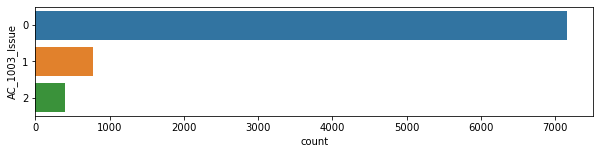

In [52]:
#AC_1003_Issue distribution 
fig = plt.figure(figsize=(10,2))
sns.countplot(y='AC_1003_Issue', data=claims);

In [53]:
# adding this to subset dataframes
claims_bin['AC_1003_Issue'] = claims['AC_1003_Issue']
claims_con['AC_1003_Issue'] = claims['AC_1003_Issue']

#### 11th column : TV_2001_Issue

In [54]:
# How many missing values does TV_2001_Issue have?
claims.TV_2001_Issue.isnull().sum()

0

In [55]:
# unique value count
claims.TV_2001_Issue.value_counts()

0    5871
1    1985
2     485
Name: TV_2001_Issue, dtype: int64

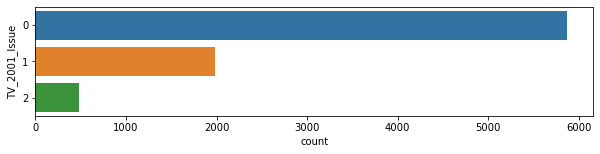

In [56]:
#TV_2001_Issue distribution 
fig = plt.figure(figsize=(10,2))
sns.countplot(y='TV_2001_Issue', data=claims);

In [57]:
# adding this to subset dataframes
claims_bin['TV_2001_Issue'] = claims['TV_2001_Issue']
claims_con['TV_2001_Issue'] = claims['TV_2001_Issue']

#### 12th column : TV_2002_Issue

In [58]:
# How many missing values does TV_2002_Issue have?
claims.TV_2002_Issue.isnull().sum()

0

In [59]:
#unique value count
claims.TV_2002_Issue.value_counts()

0    5413
1    2244
2     684
Name: TV_2002_Issue, dtype: int64

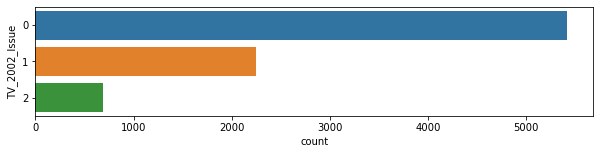

In [60]:
#TV_2002_Issue distribution 
fig = plt.figure(figsize=(10,2))
sns.countplot(y='TV_2002_Issue', data=claims);

In [61]:
# adding this to subset dataframes
claims_bin['TV_2002_Issue'] = claims['TV_2002_Issue']
claims_con['TV_2002_Issue'] = claims['TV_2002_Issue']

#### 13th column : TV_2003_Issue

In [62]:
# How many missing values does TV_2003_Issue have?
claims.TV_2003_Issue.isnull().sum()

0

In [63]:
#unique value count
claims.TV_2003_Issue.value_counts()

0    6245
1    1721
2     375
Name: TV_2003_Issue, dtype: int64

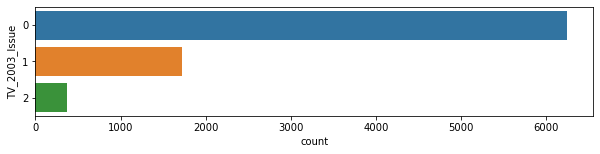

In [64]:
#TV_2003_Issue distribution 
fig = plt.figure(figsize=(10,2))
sns.countplot(y='TV_2003_Issue', data=claims);

In [65]:
# adding this to subset dataframes
claims_bin['TV_2003_Issue'] = claims['TV_2003_Issue']
claims_con['TV_2003_Issue'] = claims['TV_2003_Issue']

#### 14th column : Claim_Value

In [66]:
# How many missing values does Claim_Value have?
claims.Claim_Value.isnull().sum()

240

In [67]:
claims["Claim_Value"].median() 

10000.0

In [68]:
#imputed NA values or missing values with median of claim_value variable
claims["Claim_Value"].fillna(10000,inplace=True)

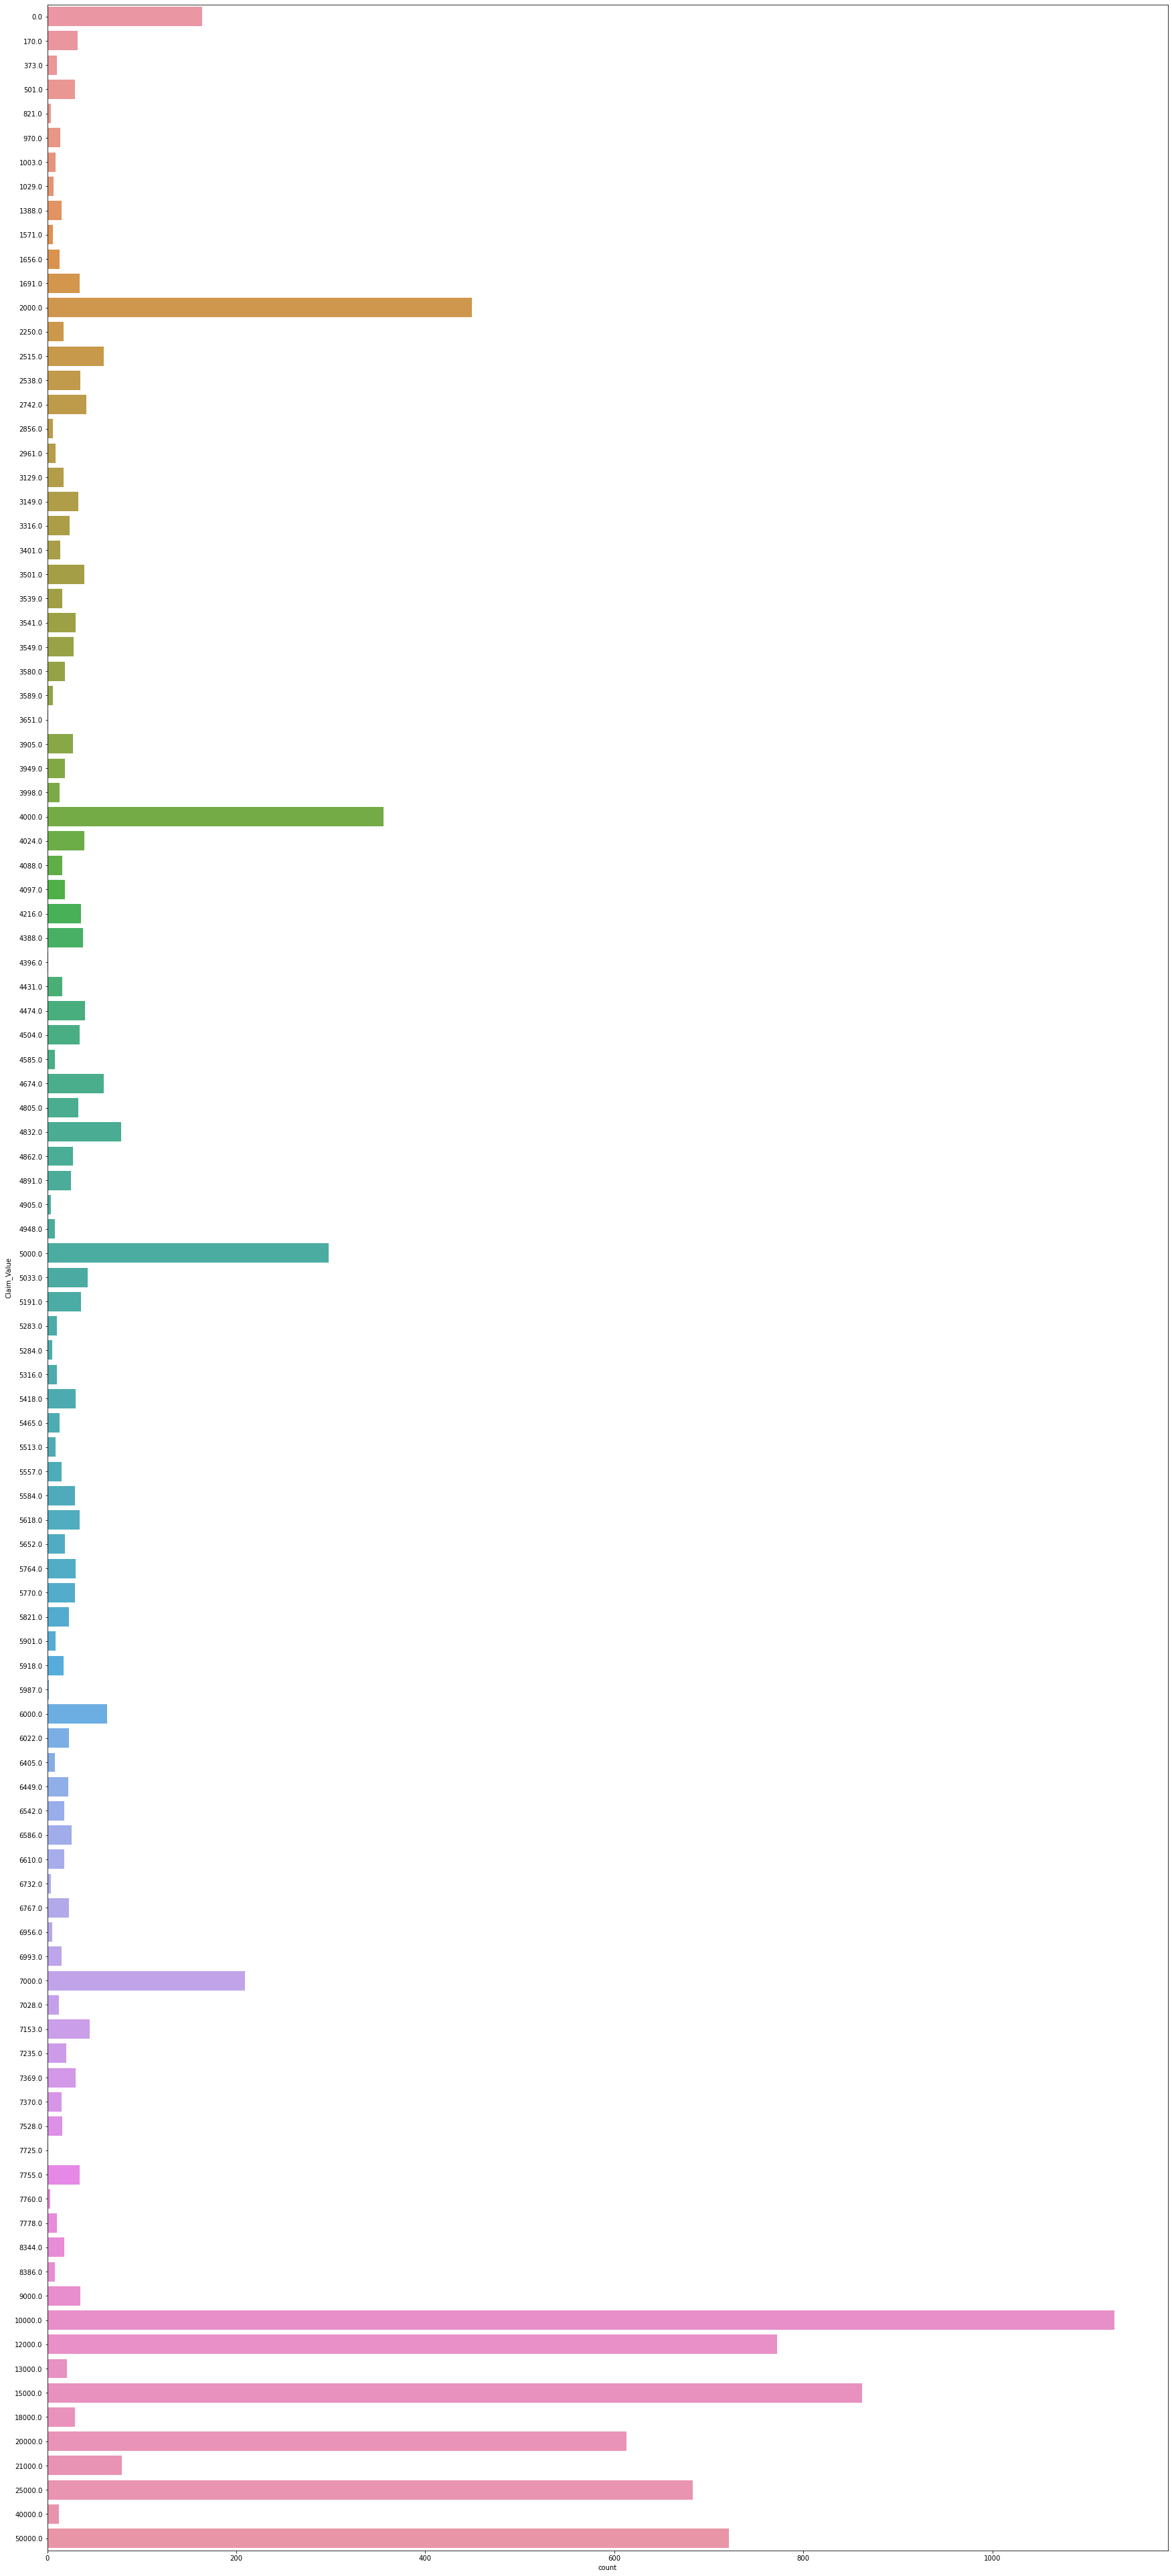

In [69]:
# How many different values of Claim_Value are there?
fig = plt.figure(figsize=(30,70))
sns.countplot(y="Claim_Value", data=claims);

In [70]:
# How many unique kinds of Claim_Value are there?
print("There are {} unique values in Claim_Value.".format(len(claims.Claim_Value.unique())))

There are 105 unique values in Claim_Value.


In [71]:
# Add Claim Value to sub dataframes
claims_bin['Claim_Value'] = pd.cut(claims['Claim_Value'], bins=5) # discretised into 5 categories
claims_con['Claim_Value'] = claims['Claim_Value'] 

In [72]:
# What do our Claim Value bins look like?
claims_bin.Claim_Value.value_counts()

(-50.0, 10000.0]      4549
(10000.0, 20000.0]    2297
(20000.0, 30000.0]     762
(40000.0, 50000.0]     721
(30000.0, 40000.0]      12
Name: Claim_Value, dtype: int64

#### 15th column : Service_Centre

In [73]:
# How many missing values does Service_Centre have?
claims.Service_Centre.isnull().sum()

0

In [74]:
#unique value count 
claims.Service_Centre.value_counts()

15    1954
12    1726
13    1627
10    1386
14    1239
11     378
16      31
Name: Service_Centre, dtype: int64

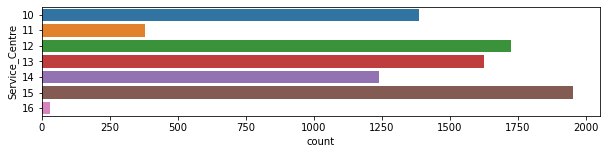

In [75]:
#Service_centre distribution 
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Service_Centre', data=claims);

In [76]:
# adding this to subset dataframes
claims_bin['Service_Centre'] = claims['Service_Centre']
claims_con['Service_Centre'] = claims['Service_Centre']

#### 16th column : Product_Age

In [77]:
# How many missing values does Product_Age have?
claims.Product_Age.isnull().sum()

0

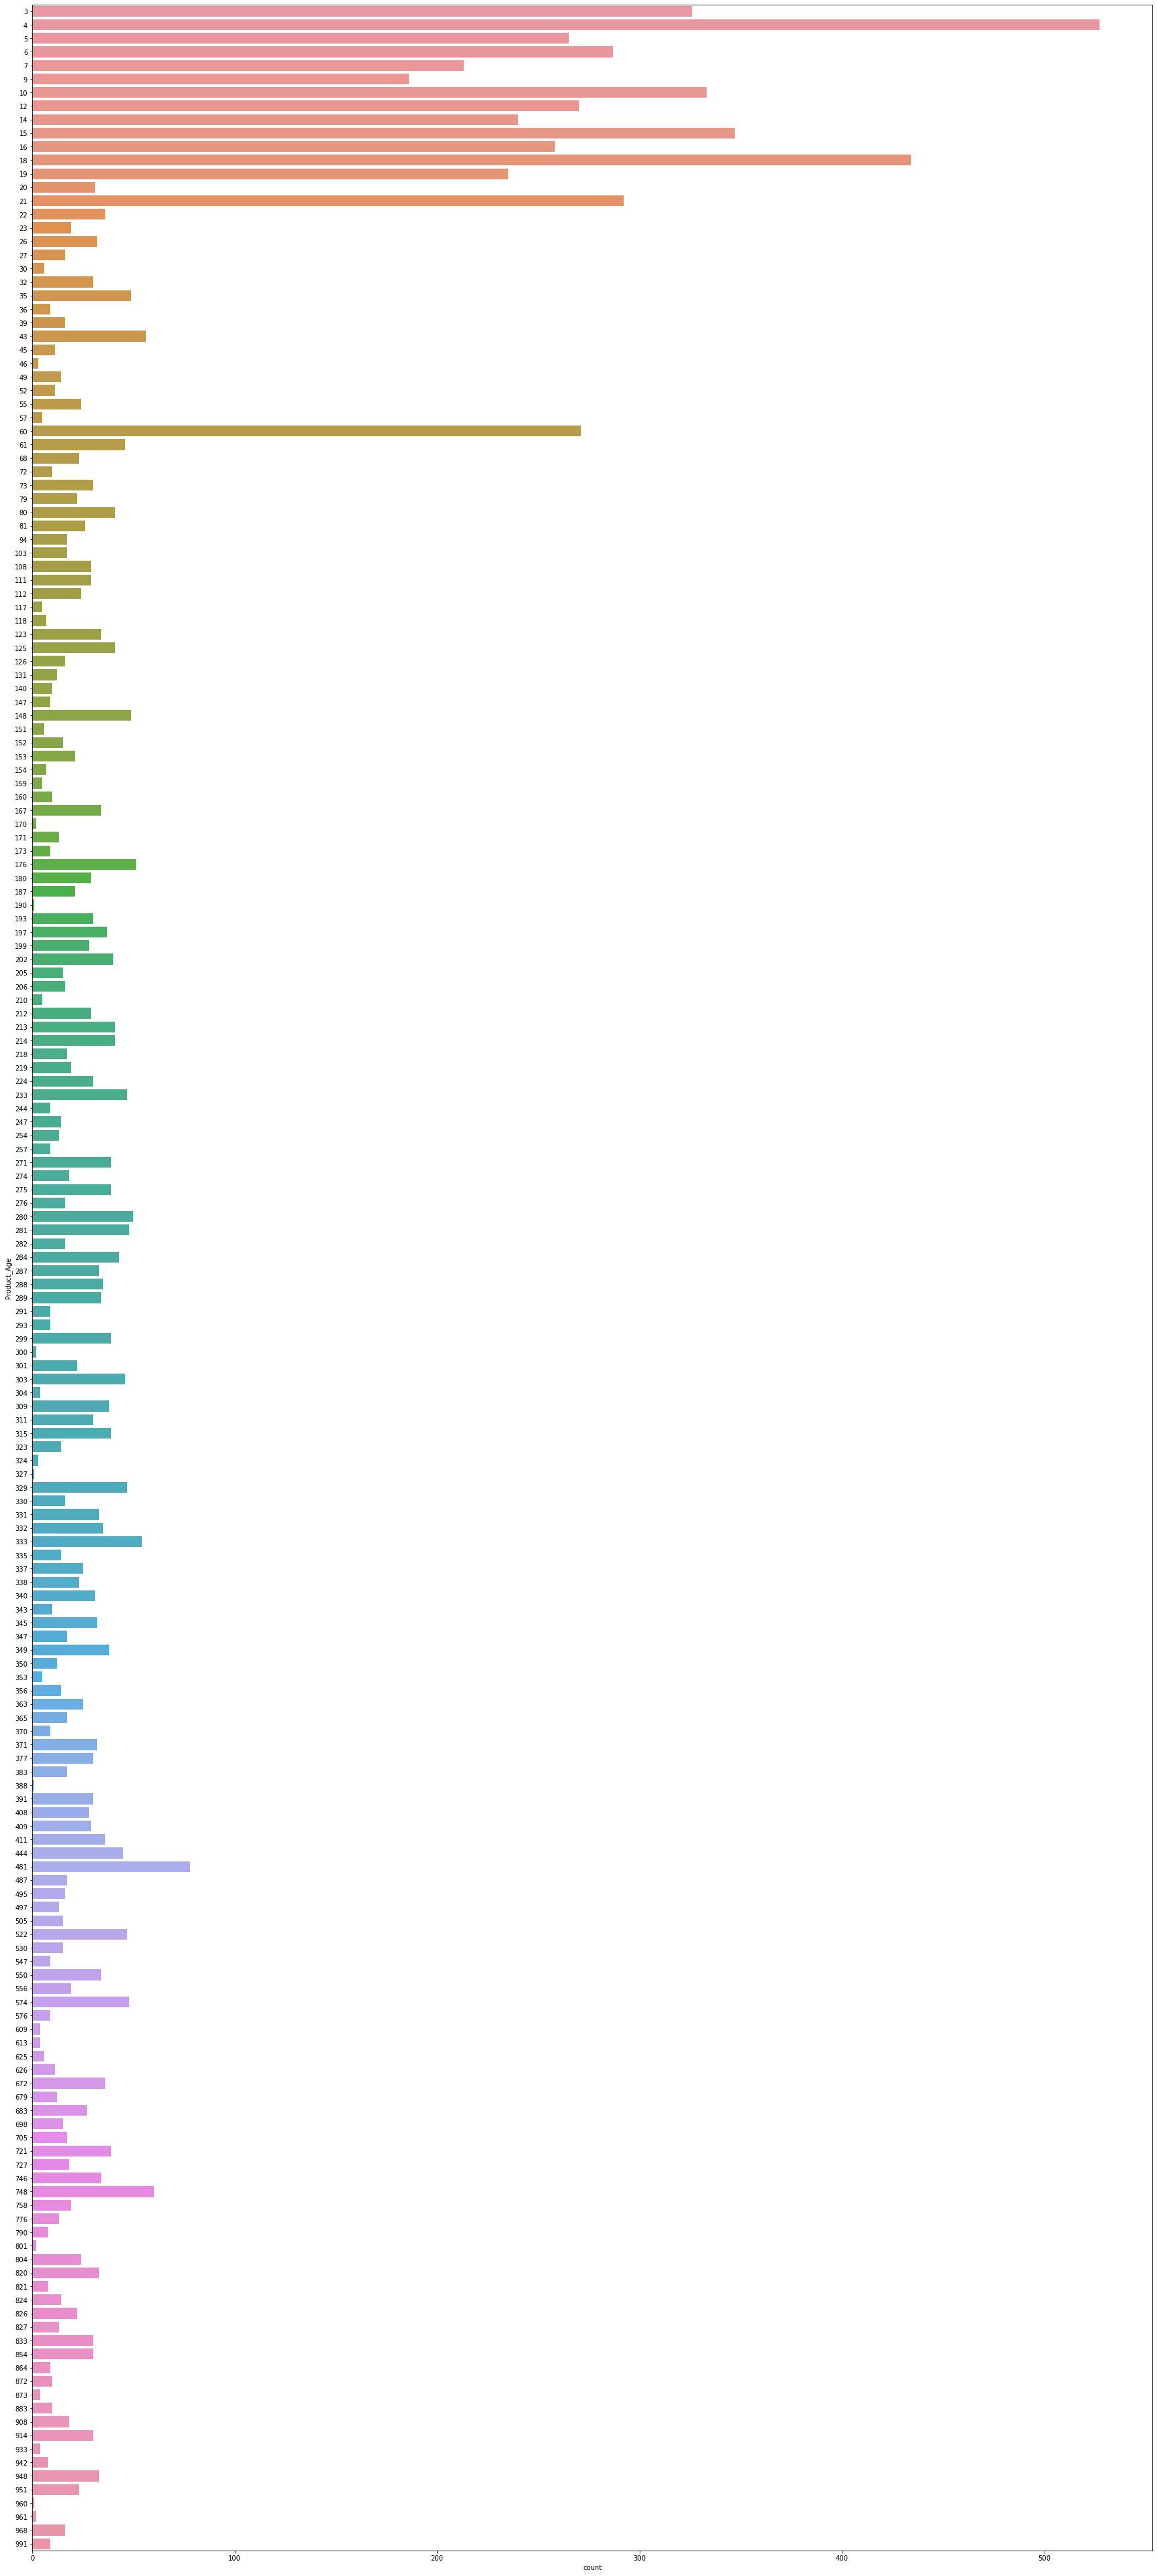

In [78]:
# How many different values of Product_Age are there?
fig = plt.figure(figsize=(30,70))
sns.countplot(y="Product_Age", data=claims);

In [79]:
# How many unique kinds of Product_Age are there?
print("There are {} unique values in Product_Age.".format(len(claims.Product_Age.unique())))

There are 188 unique values in Product_Age.


In [80]:
# Add Product_Age to sub dataframes
claims_bin['Product_Age'] = pd.cut(claims['Product_Age'], bins=5) # discretised
claims_con['Product_Age'] = claims['Product_Age'] 

In [81]:
# What do our Product_Age bins look like?
claims_bin.Product_Age.value_counts()

(2.012, 200.6]    5668
(200.6, 398.2]    1539
(398.2, 595.8]     458
(793.4, 991.0]     353
(595.8, 793.4]     323
Name: Product_Age, dtype: int64

#### 17th column : Purchased_from

In [82]:
# How many missing values does Purchased_from have?
claims.Purchased_from.isnull().sum()

0

In [83]:
#unique value count
claims.Purchased_from.value_counts()

Dealer          3512
Manufacturer    2977
Internet        1852
Name: Purchased_from, dtype: int64

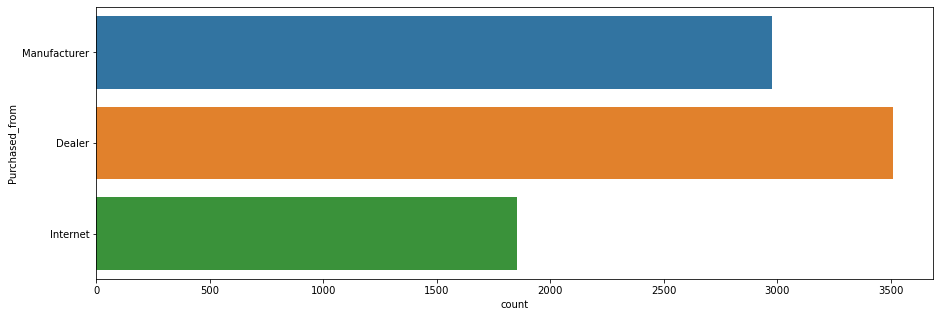

In [84]:
#Purchased_from distribution 
fig = plt.figure(figsize=(15,5))
sns.countplot(y='Purchased_from', data=claims);

In [85]:
# adding this to subset dataframes
claims_bin['Purchased_from'] = claims['Purchased_from']
claims_con['Purchased_from'] = claims['Purchased_from']

#### 18th column : Call_details

In [86]:
# How many missing values does Call_details have?
claims.Call_details.isnull().sum()

0

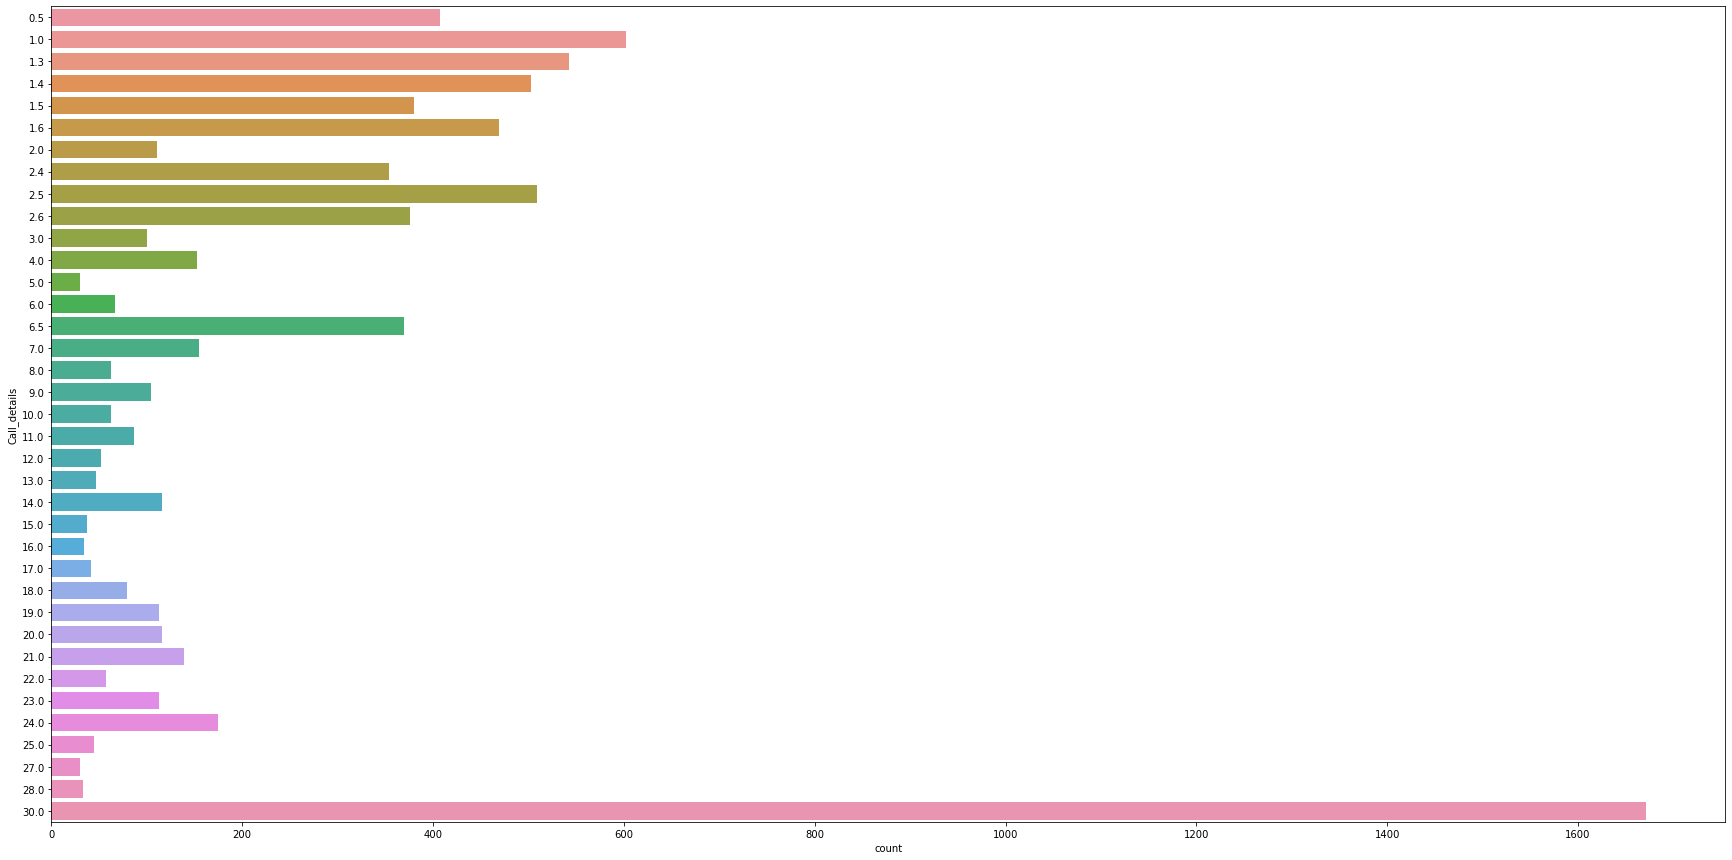

In [87]:
# How many different values of Call_details are there?
fig = plt.figure(figsize=(30,15))
sns.countplot(y="Call_details", data=claims);

In [88]:
# How many unique kinds of Call_details are there?
print("There are {} unique values in Call_details.".format(len(claims.Call_details.unique())))

There are 37 unique values in Call_details.


In [89]:
# Add Call_details to sub dataframes
claims_bin['Call_details'] = pd.cut(claims['Call_details'], bins=5) # discretised
claims_con['Call_details'] = claims['Call_details'] 

In [90]:
# What do our Call_details bins look like?
claims_bin.Call_details.value_counts()

(0.47, 6.4]     4603
(24.1, 30.0]    1779
(6.4, 12.3]      892
(18.2, 24.1]     713
(12.3, 18.2]     354
Name: Call_details, dtype: int64

#### 19th column : Purpose

In [91]:
# How many missing values does Purpose have?
claims.Purpose.isnull().sum()

0

In [92]:
#Unique value count
claims.Purpose.value_counts()

Claim        3927
Complaint    3527
Other         887
Name: Purpose, dtype: int64

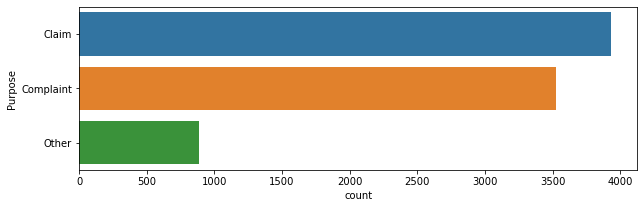

In [93]:
#purpose distribution 
fig = plt.figure(figsize=(10,3))
sns.countplot(y='Purpose', data=claims);

In [94]:
# adding this to subset dataframes
claims_bin['Purpose'] = claims['Purpose']
claims_con['Purpose'] = claims['Purpose']

#### 20th column : Fraud

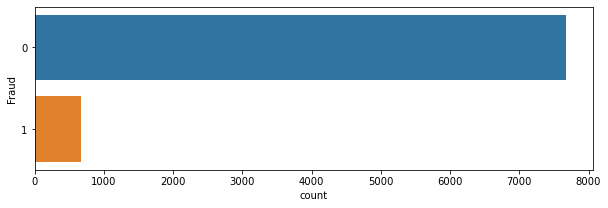

In [95]:
# How many people fraudulent?
fig = plt.figure(figsize=(10,3))
sns.countplot(y='Fraud', data=claims);

In [96]:
# Count of fraud and genuine 
claims.Fraud.value_counts() #fraud claim= 1 & genuine claim= 0

0    7675
1     666
Name: Fraud, dtype: int64

In [97]:
# adding this to subset dataframes
claims_bin['Fraud'] = claims['Fraud']
claims_con['Fraud'] = claims['Fraud']

In [98]:
claims_bin.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,North East,Assam,0,Guwhati,0,0,0,0,1,2,0,0,0,"(-50.0, 10000.0]",12,"(200.6, 398.2]",Manufacturer,"(24.1, 30.0]",Claim,0
1,East,Delhi,1,New Delhi,0,1,1,0,0,0,1,1,1,"(20000.0, 30000.0]",13,"(2.012, 200.6]",Dealer,"(0.47, 6.4]",Complaint,0
2,West,Andhra Pradesh,0,Hyderabad,1,0,0,0,0,0,0,0,0,"(-50.0, 10000.0]",12,"(2.012, 200.6]",Dealer,"(0.47, 6.4]",Claim,0
3,West,Gujarat,0,Ahmedabad,0,1,1,0,0,0,1,1,0,"(-50.0, 10000.0]",10,"(595.8, 793.4]",Dealer,"(24.1, 30.0]",Other,0
4,South West,Kerala,0,Kochi,1,0,0,0,0,0,0,0,0,"(10000.0, 20000.0]",13,"(2.012, 200.6]",Manufacturer,"(6.4, 12.3]",Claim,0


## Feature scaling

In [99]:
# One-hot encode binned variables
one_hot_cols = claims_bin.columns.tolist()
one_hot_cols.remove('Fraud')
claims_bin_enc = pd.get_dummies(claims_bin, columns=one_hot_cols)

In [100]:
claims_bin_enc.head()

,Fraud,Region_East,Region_North,Region_North East,Region_North West,Region_South,Region_South East,Region_South West,Region_West,State_Andhra Pradesh,...,Purchased_from_Internet,Purchased_from_Manufacturer,"Call_details_(0.47, 6.4]","Call_details_(6.4, 12.3]","Call_details_(12.3, 18.2]","Call_details_(18.2, 24.1]","Call_details_(24.1, 30.0]",Purpose_Claim,Purpose_Complaint,Purpose_Other
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [101]:
claims_con.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,North East,Assam,Rural,Guwhati,Personal,Household,AC,0,1,2,0,0,0,4474.0,12,202,Manufacturer,30.0,Claim,0
1,East,Delhi,Urban,New Delhi,Personal,Entertainment,TV,0,0,0,1,1,1,25000.0,13,60,Dealer,1.3,Complaint,0
2,West,Andhra Pradesh,Rural,Hyderabad,Business,Household,AC,0,0,0,0,0,0,10000.0,12,3,Dealer,2.5,Claim,0
3,West,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,0,0,0,1,1,0,4216.0,10,672,Dealer,25.0,Other,0
4,South West,Kerala,Rural,Kochi,Business,Household,AC,0,0,0,0,0,0,20000.0,13,3,Manufacturer,6.5,Claim,0


In [102]:
# One hot encode the categorical columns individually
claims_Region_one_hot = pd.get_dummies(claims_con['Region'],prefix='region')
claims_State_one_hot = pd.get_dummies(claims_con['State'],prefix='state')
claims_Area_one_hot = pd.get_dummies(claims_con['Area'],prefix='area')
claims_City_one_hot = pd.get_dummies(claims_con['City'],prefix='city')
claims_Conpro_one_hot = pd.get_dummies(claims_con['Consumer_profile'],prefix='consumer_profile')
claims_Procat_one_hot = pd.get_dummies(claims_con['Product_category'],prefix='product_category')
claims_Protyp_one_hot = pd.get_dummies(claims_con['Product_type'],prefix='product_type')
claims_Servc_one_hot = pd.get_dummies(claims_con['Service_Centre'],prefix='serrvice_centre')
claims_Purfrm_one_hot = pd.get_dummies(claims_con['Purchased_from'],prefix='purchased_from')
claims_Purpose_one_hot = pd.get_dummies(claims_con['Purpose'],prefix='purpose')

In [103]:
# Combine the one hot encoded columns with claims_con_enc
claims_con_enc = pd.concat([claims_con, 
                        claims_Region_one_hot, 
                        claims_State_one_hot, 
                        claims_Area_one_hot, 
                        claims_City_one_hot,
                        claims_Conpro_one_hot, 
                        claims_Procat_one_hot,
                        claims_Protyp_one_hot, 
                        claims_Servc_one_hot,
                        claims_Purfrm_one_hot, 
                        claims_Purpose_one_hot,], axis=1)

In [104]:
# Drop the original categorical columns (because now they've been one hot encoded)
claims_con_enc = claims_con_enc.drop(['Region', 'State', 'Area','City',
                                      'Consumer_profile','Product_category',
                                      'Product_type','Service_Centre',
                                      'Purchased_from','Purpose'], axis=1)

In [105]:
# Let's look at claims_con_enc
claims_con_enc.head(20)

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Product_Age,Call_details,Fraud,...,serrvice_centre_13,serrvice_centre_14,serrvice_centre_15,serrvice_centre_16,purchased_from_Dealer,purchased_from_Internet,purchased_from_Manufacturer,purpose_Claim,purpose_Complaint,purpose_Other
0,0,1,2,0,0,0,4474.0,202,30.0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,1,1,1,25000.0,60,1.3,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,10000.0,3,2.5,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,1,1,0,4216.0,672,25.0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,20000.0,3,6.5,0,...,1,0,0,0,0,0,1,1,0,0
5,0,0,0,0,1,1,4000.0,275,11.0,0,...,0,0,0,0,1,0,0,1,0,0
6,0,0,0,0,0,0,50000.0,10,1.6,0,...,0,0,0,0,0,0,1,1,0,0
7,0,2,1,0,0,0,13000.0,7,1.6,0,...,1,0,0,0,0,0,1,1,0,0
8,1,0,0,0,0,0,10000.0,6,1.4,0,...,1,0,0,0,1,0,0,0,1,0
9,0,0,0,0,0,0,25000.0,4,0.5,0,...,0,0,0,0,1,0,0,0,1,0


In [106]:
# Seclect the dataframe we want to use first for predictions
selected_claims = claims_con_enc
selected_claims.head()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Product_Age,Call_details,Fraud,...,serrvice_centre_13,serrvice_centre_14,serrvice_centre_15,serrvice_centre_16,purchased_from_Dealer,purchased_from_Internet,purchased_from_Manufacturer,purpose_Claim,purpose_Complaint,purpose_Other
0,0,1,2,0,0,0,4474.0,202,30.0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,1,1,1,25000.0,60,1.3,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,10000.0,3,2.5,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,1,1,0,4216.0,672,25.0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,20000.0,3,6.5,0,...,1,0,0,0,0,0,1,1,0,0


### Balancing Data

In [107]:
x_sm = pd.DataFrame.copy(selected_claims)
y_sm = x_sm.pop('Fraud')
sm = SMOTE(random_state =101)
x_train, y_train = sm.fit_sample(x_sm,y_sm)
x_train.shape, y_train.shape

((15350, 87), (15350,))

#### Converting array to Data Frame

In [108]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

### Loading Test Data

In [109]:
test = pd.read_csv("test_1.csv")

In [110]:
test.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose
0,775,South West,Andhra Pradesh,Urban,Hyderabad,Business,Entertainment,TV,0,0,0,1,1,1,10000.0,13,5,Dealer,2.6,Claim
1,3130,South West,Andhra Pradesh,Urban,Hyderabad,Business,Entertainment,TV,0,0,0,1,1,1,20000.0,13,14,Manufacturer,1.4,Claim
2,93341,West,Gujarat,Rural,Ahmedabad,Business,Entertainment,TV,0,0,0,1,1,1,NaN,11,408,Dealer,30.0,Claim
3,9498,North East,Uttar Pradesh,Urban,Lucknow,Business,Household,AC,1,0,0,0,0,0,2000.0,10,148,Manufacturer,24.0,Claim
4,78191,North East,Uttar Pradesh,Urban,Lucknow,Personal,Entertainment,TV,0,0,0,0,0,0,0.0,10,125,Internet,1.0,Complaint


#### Preprocessing for test data as train

<AxesSubplot:>

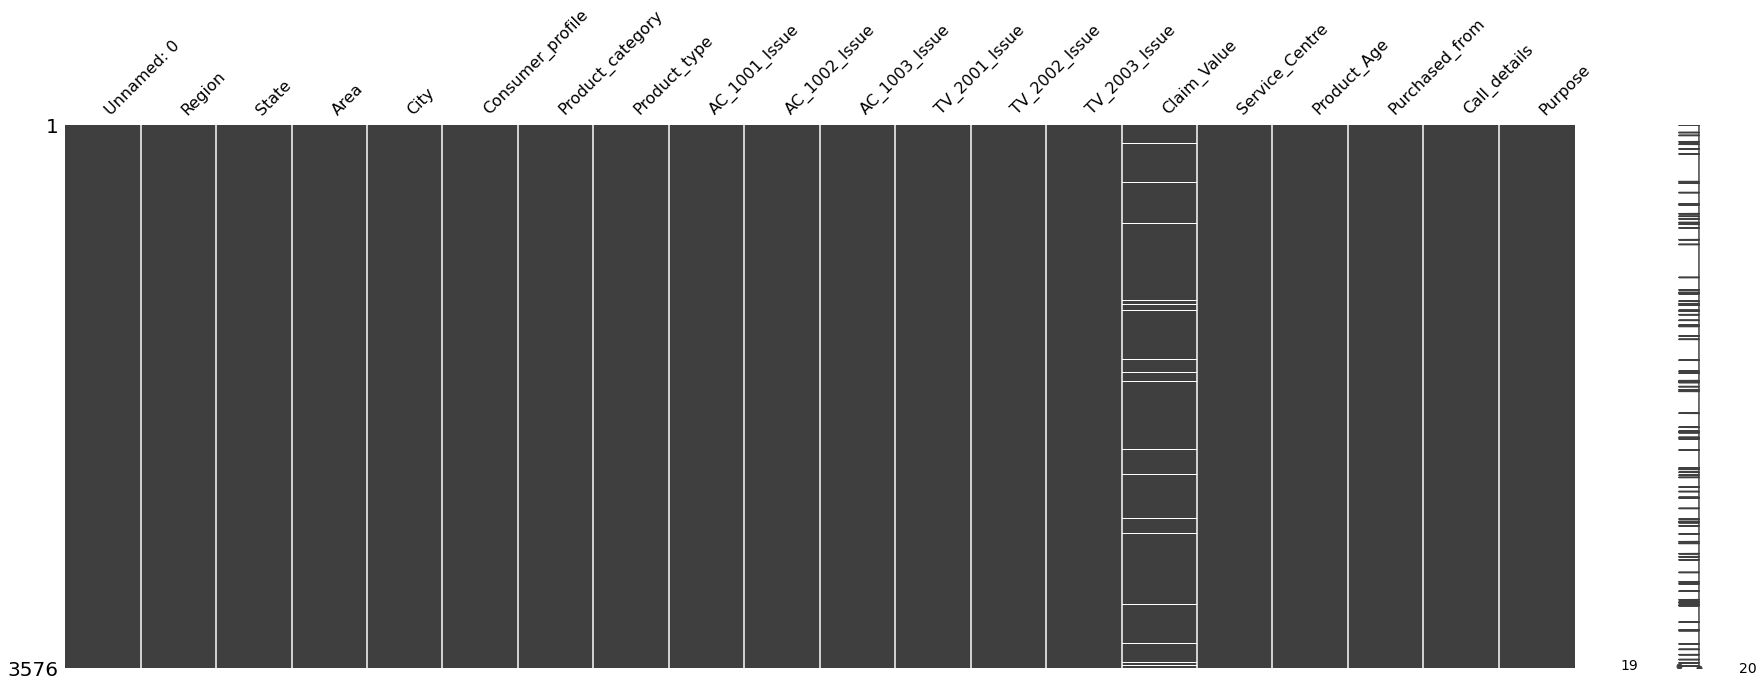

In [111]:
missingno.matrix(test, figsize = (30,10))

In [112]:
test.isnull().sum()

Unnamed: 0           0
Region               0
State                0
Area                 0
City                 0
Consumer_profile     0
Product_category     0
Product_type         0
AC_1001_Issue        0
AC_1002_Issue        0
AC_1003_Issue        0
TV_2001_Issue        0
TV_2002_Issue        0
TV_2003_Issue        0
Claim_Value         93
Service_Centre       0
Product_Age          0
Purchased_from       0
Call_details         0
Purpose              0
dtype: int64

In [113]:
## Replacing UP with Uttar Pradesh 
test.loc[(test.State == "UP"), "State"] = "Uttar Pradesh"

In [114]:
## Replacing claim with Claim
test.loc[(test.Purpose == "claim"), "Purpose"] = "Claim"

In [115]:
## Separating hyderbad among two states. like Andhra Pradesh = Hyderbad, Telengana = Hyderabad 1
test.loc[(test.State == "Telengana"), "City"] = "Hyderabad 1"

In [116]:
# Deleting first column
test.drop(["Unnamed: 0"],inplace=True,axis=1) 

In [117]:
test.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose
0,South West,Andhra Pradesh,Urban,Hyderabad,Business,Entertainment,TV,0,0,0,1,1,1,10000.0,13,5,Dealer,2.6,Claim
1,South West,Andhra Pradesh,Urban,Hyderabad,Business,Entertainment,TV,0,0,0,1,1,1,20000.0,13,14,Manufacturer,1.4,Claim
2,West,Gujarat,Rural,Ahmedabad,Business,Entertainment,TV,0,0,0,1,1,1,NaN,11,408,Dealer,30.0,Claim
3,North East,Uttar Pradesh,Urban,Lucknow,Business,Household,AC,1,0,0,0,0,0,2000.0,10,148,Manufacturer,24.0,Claim
4,North East,Uttar Pradesh,Urban,Lucknow,Personal,Entertainment,TV,0,0,0,0,0,0,0.0,10,125,Internet,1.0,Complaint


In [118]:
#imputing missing values
test.Claim_Value.isnull().sum()
test["Claim_Value"].median() #median = 10000 Rs
test["Claim_Value"].fillna(10000,inplace=True) # imputed with median 

In [119]:
test.isnull().sum()

Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
dtype: int64

#### creating dummies

In [120]:
# One hot encode the categorical columns individually
test_Region_one_hot = pd.get_dummies(test['Region'],prefix='region')
test_State_one_hot = pd.get_dummies(test['State'],prefix='state')
test_Area_one_hot = pd.get_dummies(test['Area'],prefix='area')
test_City_one_hot = pd.get_dummies(test['City'],prefix='city')
test_Conpro_one_hot = pd.get_dummies(test['Consumer_profile'],prefix='consumer_profile')
test_Procat_one_hot = pd.get_dummies(test['Product_category'],prefix='product_category')
test_Protyp_one_hot = pd.get_dummies(test['Product_type'],prefix='product_type')
test_Servc_one_hot = pd.get_dummies(test['Service_Centre'],prefix='serrvice_centre')
test_Purfrm_one_hot = pd.get_dummies(test['Purchased_from'],prefix='purchased_from')
test_Purpose_one_hot = pd.get_dummies(test['Purpose'],prefix='purpose')

In [121]:
# Combine the one hot encoded columns with test
x_test = pd.concat([test, 
                    test_Region_one_hot, 
                    test_State_one_hot, 
                    test_Area_one_hot, 
                    test_City_one_hot,
                    test_Conpro_one_hot, 
                    test_Procat_one_hot,
                    test_Protyp_one_hot, 
                    test_Servc_one_hot,
                    test_Purfrm_one_hot, 
                    test_Purpose_one_hot,], axis=1)

In [122]:
# Drop the original categorical columns (because now they've been one hot encoded)
x_test = x_test.drop(['Region', 'State', 'Area','City',
                      'Consumer_profile','Product_category',
                      'Product_type','Service_Centre',
                      'Purchased_from','Purpose'], axis=1)

In [123]:
x_test.head()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Product_Age,Call_details,region_East,...,serrvice_centre_13,serrvice_centre_14,serrvice_centre_15,serrvice_centre_16,purchased_from_Dealer,purchased_from_Internet,purchased_from_Manufacturer,purpose_Claim,purpose_Complaint,purpose_Other
0,0,0,0,1,1,1,10000.0,5,2.6,0,...,1,0,0,0,1,0,0,1,0,0
1,0,0,0,1,1,1,20000.0,14,1.4,0,...,1,0,0,0,0,0,1,1,0,0
2,0,0,0,1,1,1,10000.0,408,30.0,0,...,0,0,0,0,1,0,0,1,0,0
3,1,0,0,0,0,0,2000.0,148,24.0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0.0,125,1.0,0,...,0,0,0,0,0,1,0,0,1,0


### Building Models

##### 1) Logistic Regression

In [124]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

80.76

#### 2) SVM

In [125]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

72.53

#### 3) KNN

In [126]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

96.57

#### 4) Decision Tree

In [127]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

97.32

#### 5) Random Forest

In [128]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

97.32

## Model Evalution

In [129]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False, ignore_index=True)

,Model,Score
0,Random Forest,97.32
1,Decision Tree,97.32
2,KNN,96.57
3,Logistic Regression,80.76
4,Support Vector Machines,72.53
